<a href="https://colab.research.google.com/github/Quan21046403/Ai/blob/main/Fuzzyhomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Fuzzy logic–based clinical decision support system for the evaluation of renal function in post‐Transplant Patients#

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5e9aa48e0e126ee1c1863e7ec785b99dd1b825fd7f35ba9aea75ac91b3e1f2f8
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [3]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

416.70634920634916


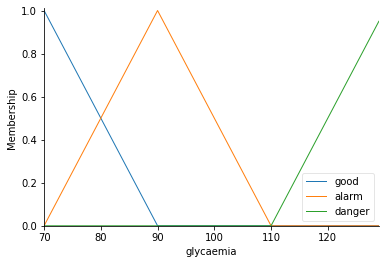

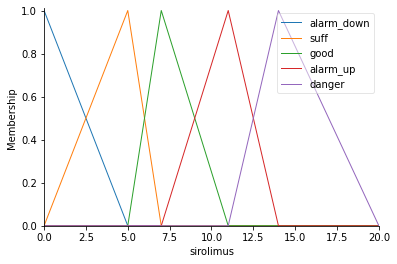

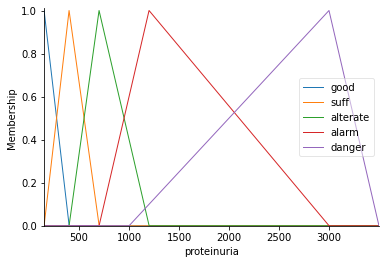

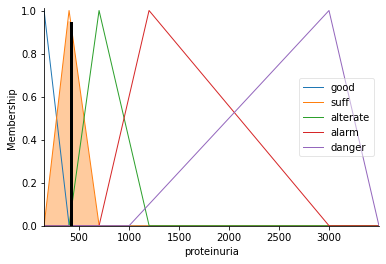

In [4]:
# Define input and output variables 
glycaemia = ctrl.Antecedent(np.arange(70,130,1),'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0,21,1),'sirolimus')
proteinuria = ctrl.Consequent(np.arange(150,3500,1),'proteinuria')

# Set membership functions
glycaemia['good']=fuzz.trimf(glycaemia.universe, [70,70,90])
glycaemia['alarm']=fuzz.trimf(glycaemia.universe, [70,90,110])
glycaemia['danger']=fuzz.trimf(glycaemia.universe, [110,130,130])

sirolimus['alarm_down']=fuzz.trimf(sirolimus.universe, [0,0,5])
sirolimus['suff']=fuzz.trimf(sirolimus.universe, [0,5,7])
sirolimus['good']=fuzz.trimf(sirolimus.universe, [5,7,11])
sirolimus['alarm_up']=fuzz.trimf(sirolimus.universe, [7,11,14])
sirolimus['danger']=fuzz.trimf(sirolimus.universe, [11,14,20])

proteinuria['good']=fuzz.trimf(proteinuria.universe, [150,150,400])
proteinuria['suff']=fuzz.trimf(proteinuria.universe, [150,400,700])
proteinuria['alterate']=fuzz.trimf(proteinuria.universe, [400,700,1200])
proteinuria['alarm']=fuzz.trimf(proteinuria.universe, [700,1200,3000])
proteinuria['danger']=fuzz.trimf(proteinuria.universe, [1000,3000,3500])

glycaemia.view()
sirolimus.view()
proteinuria.view()

# Rule 
rule1 = ctrl.Rule(glycaemia['good']&sirolimus['good'], proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger']&sirolimus['danger'], proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good']&sirolimus['suff'], proteinuria['suff'])
rule4 = ctrl.Rule(glycaemia['alarm']&sirolimus['alarm_up'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm']&sirolimus['suff'], proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_up'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm']&sirolimus['good'], proteinuria['suff'])
rule8 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_down'], proteinuria['suff'])

proteinuria_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])

# Simulation
proteinuria_simulation = ctrl.ControlSystemSimulation(proteinuria_control)
proteinuria_simulation.input['glycaemia'] = 91
proteinuria_simulation.input['sirolimus'] = 7
proteinuria_simulation.compute()
print(proteinuria_simulation.output['proteinuria'])
proteinuria.view(sim=proteinuria_simulation)